In [0]:

!pip install Pillow==4.1.1
!pip install "fastai==0.7.0"
!pip install torchtext==0.2.3



%matplotlib inline
!pip install kaggle

In [0]:
from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics
import feather

In [0]:
!mkdir -p ~/.kaggle

In [0]:
!cp kaggle.json ~/.kaggle/


In [0]:
!pip install pyarrow==0.10.0

In [0]:
!kaggle competitions download -c bluebook-for-bulldozers

Train.7z: Skipping, found more recently modified local copy (use --force to force download)
Train.zip: Skipping, found more recently modified local copy (use --force to force download)
Valid.7z: Skipping, found more recently modified local copy (use --force to force download)
Valid.csv: Skipping, found more recently modified local copy (use --force to force download)
Valid.zip: Skipping, found more recently modified local copy (use --force to force download)
Data%20Dictionary.xlsx: Skipping, found more recently modified local copy (use --force to force download)
median_benchmark.csv: Skipping, found more recently modified local copy (use --force to force download)
Machine_Appendix.csv: Skipping, found more recently modified local copy (use --force to force download)
ValidSolution.csv: Skipping, found more recently modified local copy (use --force to force download)
TrainAndValid.7z: Skipping, found more recently modified local copy (use --force to force download)
TrainAndValid.csv: Ski

In [0]:
set_plot_sizes(12,14,16)

In [0]:
!unzip Train.zip

Archive:  Train.zip
replace Train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [0]:
df_raw = pd.read_csv("Train.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (13,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
cp raw tmp/

In [0]:
df_raw = feather.read_dataframe('raw')

In [0]:
df_trn, y_trn, nas = proc_df(df_raw, 'SalePrice', subset=30000, na_dict=nas)
X_train, _ = split_vals(df_trn, 20000)
y_train, _ = split_vals(y_trn, 20000)


In [0]:
def split_vals(a,n): return a[:n], a[n:]
n_valid = 12000
n_trn = len(df_trn)-n_valid
X_train, X_valid = split_vals(df_trn, n_trn)
y_train, y_valid = split_vals(y_trn, n_trn)
raw_train, raw_valid = split_vals(df_raw, n_trn)

In [0]:
# base model
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [0]:
df_raw

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,saleDay,saleDayofweek,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed
0,1139246,11.097410,999089,3157,121,3.0,2004,68.0,Low,521D,...,16,3,320,False,False,False,False,False,False,1163635200
1,1139248,10.950807,117657,77,121,3.0,1996,4640.0,Low,950FII,...,26,4,86,False,False,False,False,False,False,1080259200
2,1139249,9.210340,434808,7009,121,3.0,2001,2838.0,High,226,...,26,3,57,False,False,False,False,False,False,1077753600
3,1139251,10.558414,1026470,332,121,3.0,2001,3486.0,High,PC120-6E,...,19,3,139,False,False,False,False,False,False,1305763200
4,1139253,9.305651,1057373,17311,121,3.0,2007,722.0,Medium,S175,...,23,3,204,False,False,False,False,False,False,1248307200
5,1139255,10.184900,1001274,4605,121,3.0,2004,508.0,Low,310G,...,18,3,353,False,False,False,False,False,False,1229558400
6,1139256,9.952278,772701,1937,121,3.0,1993,11540.0,High,790ELC,...,26,3,239,False,False,False,False,False,False,1093478400
7,1139261,10.203592,902002,3539,121,3.0,2001,4883.0,High,416D,...,17,3,321,False,False,False,False,False,False,1132185600
8,1139272,9.975808,1036251,36003,121,3.0,2008,302.0,Low,430HAG,...,27,3,239,False,False,False,False,False,False,1251331200
9,1139275,11.082143,1016474,3883,121,3.0,1000,20700.0,Medium,988B,...,9,3,221,False,False,False,False,False,False,1186617600


#creating our own Trees and Forest

In [0]:
# creating a single tree

m = RandomForestRegressor(n_estimators = 1,max_depth =3,bootstrap = False,n_jobs = -1)
m.fit(X_train,y_train)
print_score(m)



[0.4833891163589381, 0.550330272285545, 0.4599664764171334, 0.4497338794207317]


In [0]:
# by removing max_depth = 3
# the training R² becomes 1 
# (as expected since each leaf node contains exactly one element) and validation R² is 0.73 

m = RandomForestRegressor(n_estimators=1, bootstrap=False, 
                          # we are making a tree of depth =1 as we are trying to fit it better
                          n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[7.371821433577905e-17, 0.5277524750161857, 1.0, 0.49395804361353873]


In [0]:
# creating a single overfitted tree and ensembling trees later to make distinct overfitted trees
m = RandomForestRegressor(n_jobs=-1) 
m.fit(X_train, y_train) 
print_score(m)

[0.11089330753801001, 0.3913551574142462, 0.9715791109908245, 0.7217289084385508]


## bagging i.e. creating forest from single leafed trees

In [0]:
# we are making trees in 10 diff field overfittings

# Each tree is stored in an attribute called estimators_ . 
# For each tree, we will call predict with our validation set. 
# np.stack concatenates them together on a new axis, 
# so the resulting preds has the shape of (10, 12000) (10 trees, 12000 validation set). 

preds = np.stack([t.predict(X_valid) for t in m.estimators_])
preds[:,0], np.mean(preds[:,0]), y_valid[0]


(array([ 9.15905, 10.29215,  9.21034,  9.74097,  9.61581, 10.59663,  9.71112,  9.25913,  9.39266,  9.02401]),
 9.600186074670063,
 9.86526633971593)

In [0]:
preds.shape

(10, 12000)

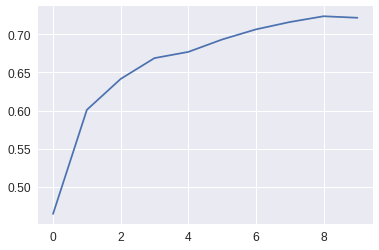

In [0]:
plt.plot([metrics.r2_score(y_valid,np.mean(preds[:i+1],axis =0)) for i in range(10)])

The mean of 10 predictions for the first data is 9.07, and the actual value is 9.10

##adding oob score

In [0]:
# adding more trees wont help after sometime
# so we use oob score = true or false
# oob lets tree use values which are not used by other trees


m = RandomForestRegressor(n_estimators=40, n_jobs=-1, 
                          oob_score=True)
m.fit(X_train, y_train)
print_score(m)

# Setting oob_score to true will do exactly this and create an attribute 
# called oob_score_ to the model

#  the more trees you add, the less serious that underestimation is.

[0.09509561360958005, 0.3809075852540361, 0.9790999197041402, 0.7363879788602985, 0.8509081813476406]


## Avoiding overfitting using Subsampling

In [0]:
# instead of creating samples of whole data and let all trees access data from there
# we will let whole data's subsets access to different trees 
# this way model will see all data


set_rf_samples(20000)  # we creating 20k samples out of 310k instead of 30k 

m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.08591926145517875, 0.38402264215594356, 0.9829388596751693, 0.732058717792007, 0.8484237257822522]


In [0]:
# Since each additional tree allows the model to see more data, 
# this approach can make additional trees more useful.

m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

# OOB score needs to be turned off when using set_rf_samples as they are not compatible. 
# reset_rf_samples() will turn it back to the way it was.


[0.08633985372970197, 0.37877133759439685, 0.9827714153290567, 0.7393365230828035, 0.8486929565488214]


In [0]:
reset_rf_samples()  # We revert to using a full bootstrap sample 
# in order to show the impact of other over-fitting avoidance methods.

m = RandomForestRegressor(n_estimators=40, n_jobs=-1, 
                          oob_score=True)
m.fit(X_train, y_train)
print_score(m)
# oob score is in last

[0.09565603301862874, 0.37457794256277627, 0.978852856284707, 0.7450762089296317, 0.849359739842675]


In [0]:
# Here OOB is higher than validation set. 
# This is because our validation set is a different time period whereas OOB samples are random. 
# It is much harder to predict a different time period

## adjusting min_samples leaf to increase speed and accuracy

In [0]:
# now we will set min_samples_leaf = 3 which will lead to stop training of tree
# when leaf nodes are 3 or less than 3 so we will have 1-2 layers less to train

m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.13490942308231063, 0.37570561998379526, 0.9579359045096116, 0.7435389880122897, 0.8521522033733405]


## Adjusting max feature

In [0]:
# : The idea is that the less correlated your trees are with each other, the better. 
# Imagine you had one column that was so much better than all of the other columns of 
# being predictive that every single tree you built always started with that column. 
# But there might be some interaction of variables where that interaction is more 
# important than the individual column.So if every tree always splits on the same 
# thing the first time, you will not get much variation in those trees.


# take a subset of columns also instead of rows 0.5 = randomly choose half of rows

# we can use max features as sqrt , .5, None

m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.14210278757317785, 0.3486848905221361, 0.9533306041076084, 0.7791017751514461, 0.853332784522161]


Radn

In [0]:
df_raw.to_feather('tmp/ml2')